In [112]:
from citipy import citipy
import pandas as pd
import numpy as np
import requests as req
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
# Andy's api key
api_key = "bab6ed8714b504b5454b34baa8e421bb"

In [97]:
# Generate random cities by lat,lng (size n = 500)
# List for holding lat_lngs
lat_lngs = []
cities = []

In [98]:
# create a set of random lat and lng combinations 
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000,size=1500)
lat_lngs=zip(lats, lngs)

In [99]:
# identify nearest city for each lat, lng combo
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # if city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

In [100]:
# print city count to confirm sufficient count
len(cities)

627

In [101]:
# create DataFrame for cities
cities_df = pd.DataFrame({'Latitude': lats, 'Longitude': lngs})

In [102]:
cities_df.head()

,Latitude,Longitude
0,40.839784,94.985041
1,-19.643056,-84.903671
2,-61.243176,10.501139
3,81.579187,-173.536749
4,25.875072,-73.017857


In [103]:
cities_df.shape

(1500, 2)

In [104]:
# randomly select 500 cities (test with 5)
selected_cities = cities_df.sample(n=500)
selected_cities.head()

,Latitude,Longitude
301,17.584802,85.358970
141,19.764374,66.540265
1455,-81.894977,-143.816811
140,51.011618,-32.556042
830,17.673500,115.897267


In [105]:
selected_cities["Temperature"] = ""
selected_cities["Humidity %"] = ""
selected_cities["Wind Speed"] = ""
selected_cities["Cloudiness %"]= ""
selected_cities.head()

,Latitude,Longitude,Temperature,Humidity %,Wind Speed,Cloudiness %
301,17.584802,85.358970,,,,
141,19.764374,66.540265,,,,
1455,-81.894977,-143.816811,,,,
140,51.011618,-32.556042,,,,
830,17.673500,115.897267,,,,


In [106]:
# counter 
row_count = 0

for index, row in selected_cities.iterrows():
    # Create endpoint URL
    
    lat = row["Latitude"]
    lng = row["Longitude"]
    target_url = "http://api.openweathermap.org/data/2.5/weather?lat={}&lon={}&units=IMPERIAL&mode=json&APPID={}".format(lat, lng,api_key)
    # print log to ensure loop is working correctly
    print("Now retrieving city # " + str(row_count))
    print(target_url)
    row_count +=1
    
    # run requests to grab JSON at the requested URL
    requests = req.get(target_url).json()
    
    # append the lat/lng to appropiate columns
    # use try / except to skip any cities
    
    try:
        selected_cities.set_value(index, "Temperature", requests["main"]["temp"])
        selected_cities.set_value(index, "Humidity %", requests["main"]["humidity"])
        selected_cities.set_value(index, "Wind Speed", requests["wind"]["speed"])
        selected_cities.set_value(index, "Cloudiness %", requests["clouds"]["all"])
        
        print("--", end="")
    
    except:
        print(" Missing field... skipping.")

selected_cities.head()

Now retrieving city # 0
http://api.openweathermap.org/data/2.5/weather?lat=17.584802196128734&lon=85.3589698864937&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 1
http://api.openweathermap.org/data/2.5/weather?lat=19.76437418005446&lon=66.54026485535644&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 2
http://api.openweathermap.org/data/2.5/weather?lat=-81.89497690509174&lon=-143.81681139776794&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 3
http://api.openweathermap.org/data/2.5/weather?lat=51.01161805554028&lon=-32.55604156896783&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 4
http://api.openweathermap.org/data/2.5/weather?lat=17.673500266229&lon=115.89726742483197&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 5
http://api.openweathermap.org/data/2.5/weather?lat=-88.5616058982554

--Now retrieving city # 45
http://api.openweathermap.org/data/2.5/weather?lat=-9.000018876315252&lon=177.90795437954347&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 46
http://api.openweathermap.org/data/2.5/weather?lat=-55.041738079902586&lon=-96.01111954881978&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 47
http://api.openweathermap.org/data/2.5/weather?lat=-25.405116191350814&lon=-3.9173969061587854&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 48
http://api.openweathermap.org/data/2.5/weather?lat=39.91039076732605&lon=68.02124610069276&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 49
http://api.openweathermap.org/data/2.5/weather?lat=47.26110005787868&lon=102.27287821097735&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 50
http://api.openweathermap.org/data/2.5/weather?lat=88

--Now retrieving city # 90
http://api.openweathermap.org/data/2.5/weather?lat=8.361833815148728&lon=-35.87411494819844&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 91
http://api.openweathermap.org/data/2.5/weather?lat=-87.33538405025631&lon=-19.727976563156005&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 92
http://api.openweathermap.org/data/2.5/weather?lat=-69.57138699341455&lon=-6.677561201326938&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 93
http://api.openweathermap.org/data/2.5/weather?lat=60.26232623945492&lon=86.38608293991484&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 94
http://api.openweathermap.org/data/2.5/weather?lat=76.29029945443264&lon=124.1546206928935&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 95
http://api.openweathermap.org/data/2.5/weather?lat=-56.81

--Now retrieving city # 135
http://api.openweathermap.org/data/2.5/weather?lat=38.02505556416892&lon=-33.44086663446305&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 136
http://api.openweathermap.org/data/2.5/weather?lat=-89.33748990050192&lon=-14.211507484996531&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 137
http://api.openweathermap.org/data/2.5/weather?lat=20.948399495849685&lon=75.77839641082065&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 138
http://api.openweathermap.org/data/2.5/weather?lat=-10.077974209980454&lon=-62.85478981531605&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 139
http://api.openweathermap.org/data/2.5/weather?lat=52.552698683669604&lon=168.539801045461&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 140
http://api.openweathermap.org/data/2.5/weather?la

--Now retrieving city # 180
http://api.openweathermap.org/data/2.5/weather?lat=58.19293513522106&lon=167.67749294548116&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 181
http://api.openweathermap.org/data/2.5/weather?lat=-63.79042983571328&lon=24.777411933956074&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 182
http://api.openweathermap.org/data/2.5/weather?lat=-49.43609104336583&lon=-110.06627149822599&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 183
http://api.openweathermap.org/data/2.5/weather?lat=52.21708802673507&lon=-30.611163408913626&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 184
http://api.openweathermap.org/data/2.5/weather?lat=65.04290000161873&lon=-137.36086114389826&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 185
http://api.openweathermap.org/data/2.5/weather?

--Now retrieving city # 225
http://api.openweathermap.org/data/2.5/weather?lat=-14.727801606245492&lon=145.2145975829318&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 226
http://api.openweathermap.org/data/2.5/weather?lat=-82.90929253285772&lon=-92.06652086838021&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 227
http://api.openweathermap.org/data/2.5/weather?lat=40.30490710986288&lon=133.66567232751675&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 228
http://api.openweathermap.org/data/2.5/weather?lat=35.79997555267977&lon=-154.2291905751673&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 229
http://api.openweathermap.org/data/2.5/weather?lat=17.52476151556074&lon=-33.994955932297756&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 230
http://api.openweathermap.org/data/2.5/weather?la

--Now retrieving city # 270
http://api.openweathermap.org/data/2.5/weather?lat=70.21210152224137&lon=-16.456302228346317&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 271
http://api.openweathermap.org/data/2.5/weather?lat=82.41892043495133&lon=-168.03021131477084&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 272
http://api.openweathermap.org/data/2.5/weather?lat=5.330449615761509&lon=42.98136925122898&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 273
http://api.openweathermap.org/data/2.5/weather?lat=-48.20407497495579&lon=-9.895239189535289&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 274
http://api.openweathermap.org/data/2.5/weather?lat=-75.55484703722101&lon=4.477534831580215&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 275
http://api.openweathermap.org/data/2.5/weather?lat

--Now retrieving city # 315
http://api.openweathermap.org/data/2.5/weather?lat=74.16813089427734&lon=179.29468168919368&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 316
http://api.openweathermap.org/data/2.5/weather?lat=62.20647933861062&lon=99.9770518500323&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 317
http://api.openweathermap.org/data/2.5/weather?lat=8.12414575585791&lon=-134.41851874981828&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 318
http://api.openweathermap.org/data/2.5/weather?lat=-19.37335448983316&lon=-32.57709585925349&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 319
http://api.openweathermap.org/data/2.5/weather?lat=-9.091847585446018&lon=-138.26029402097686&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 320
http://api.openweathermap.org/data/2.5/weather?lat=

--Now retrieving city # 360
http://api.openweathermap.org/data/2.5/weather?lat=-56.679814603276505&lon=-165.05334991850214&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 361
http://api.openweathermap.org/data/2.5/weather?lat=-36.5240964338188&lon=98.3695419158858&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 362
http://api.openweathermap.org/data/2.5/weather?lat=41.38423659728144&lon=-64.52466017017417&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 363
http://api.openweathermap.org/data/2.5/weather?lat=74.12135518514123&lon=62.10094266035992&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 364
http://api.openweathermap.org/data/2.5/weather?lat=16.21627955351292&lon=123.86315474170829&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 365
http://api.openweathermap.org/data/2.5/weather?lat=5

--Now retrieving city # 405
http://api.openweathermap.org/data/2.5/weather?lat=-72.52927480896659&lon=109.11620276977237&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 406
http://api.openweathermap.org/data/2.5/weather?lat=-40.60240703382629&lon=160.76013392261655&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 407
http://api.openweathermap.org/data/2.5/weather?lat=-19.307716354046732&lon=92.98700284119764&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 408
http://api.openweathermap.org/data/2.5/weather?lat=45.24718637921043&lon=127.54664630501287&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 409
http://api.openweathermap.org/data/2.5/weather?lat=-9.559081278488335&lon=164.37043750537543&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 410
http://api.openweathermap.org/data/2.5/weather?l

--Now retrieving city # 450
http://api.openweathermap.org/data/2.5/weather?lat=45.597948223915296&lon=-11.645114978034684&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 451
http://api.openweathermap.org/data/2.5/weather?lat=84.42188503413124&lon=-1.7628866337424256&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 452
http://api.openweathermap.org/data/2.5/weather?lat=-31.851761303014896&lon=-11.462645153638505&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 453
http://api.openweathermap.org/data/2.5/weather?lat=-20.19305729666442&lon=-93.07338428606188&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 454
http://api.openweathermap.org/data/2.5/weather?lat=64.82141061066923&lon=-111.74156749425917&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 455
http://api.openweathermap.org/data/2.5/weath

--Now retrieving city # 495
http://api.openweathermap.org/data/2.5/weather?lat=42.523865919167235&lon=147.83299690136516&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 496
http://api.openweathermap.org/data/2.5/weather?lat=-82.19956918246463&lon=-23.08058637464748&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 497
http://api.openweathermap.org/data/2.5/weather?lat=42.90751937007613&lon=-62.93561363120101&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 498
http://api.openweathermap.org/data/2.5/weather?lat=21.664419097755953&lon=-145.1513251980662&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 499
http://api.openweathermap.org/data/2.5/weather?lat=-42.121655593108486&lon=167.53870600275445&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--

,Latitude,Longitude,Temperature,Humidity %,Wind Speed,Cloudiness %
301,17.584802,85.358970,77.3,100,14.45,0
141,19.764374,66.540265,79.82,99,25.34,20
1455,-81.894977,-143.816811,11.82,88,9.13,0
140,51.011618,-32.556042,53.99,92,12.33,92
830,17.673500,115.897267,79.64,100,29.44,12


In [107]:
selected_cities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 301 to 1385
Data columns (total 6 columns):
Latitude        500 non-null float64
Longitude       500 non-null float64
Temperature     500 non-null object
Humidity %      500 non-null object
Wind Speed      500 non-null object
Cloudiness %    500 non-null object
dtypes: float64(2), object(4)
memory usage: 47.3+ KB


In [133]:
# save df as a csv
selected_cities.to_csv("weather_py_data.csv", encoding="utf-8", index=False)

In [149]:
# plot Temperature vs Latitude

plt.scatter(selected_cities["Latitude"],
           selected_cities["Temperature"],
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8)

plt.title("Latitude vs Temperature (F) 12/4/17")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid(True)
plt.xlim([-100, 100])
plt.ylim([-100, 150])

plt.savefig("LatTemp.png")

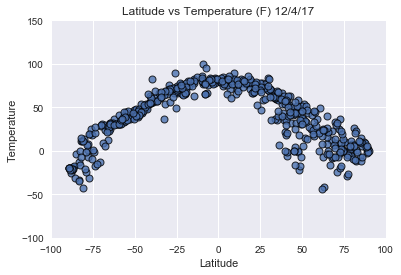

In [150]:
sns.set()
plt.show()

In [151]:
plt.scatter(selected_cities["Latitude"],
           selected_cities["Humidity %"],
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8)

plt.title("Latitude vs Humidity (F) 12/4/17")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.xlim([-100, 100])
plt.ylim([-20, 120])

# save figure
plt.savefig("LatHumidity.png")

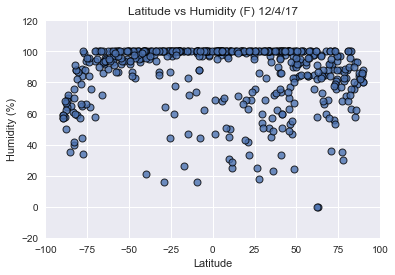

In [152]:
sns.set()
plt.show()

In [153]:
plt.scatter(selected_cities["Latitude"],
           selected_cities["Cloudiness %"],
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8)

plt.title("Latitude vs Cloudiness (%) 12/4/17")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.xlim([-100, 100])
plt.ylim([-20, 120])

# save figure
plt.savefig("LatCloud.png")

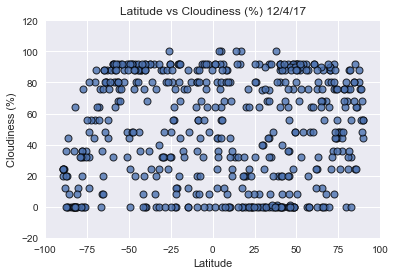

In [154]:
sns.set()
plt.show()

In [155]:
plt.scatter(selected_cities["Latitude"],
           selected_cities["Wind Speed"],
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8)

plt.title("Latitude vs Wind Speed 12/4/17")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.xlim([-100, 100])
plt.ylim([-5, 50])

# save figure
plt.savefig("LatWind.png")

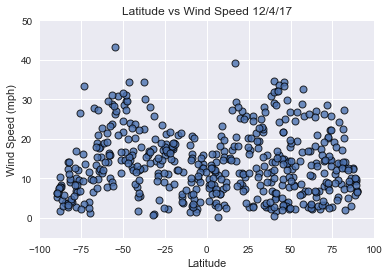

In [156]:
sns.set()
plt.show()